## Model the HOD and Richness Mass of the Galaxies

In [2]:
## Use the setup.py file to output directories. 
import sys
sys.path.append('/global/homes/z/zzhang13/BaryonPasting/CorrelatedStructures/multiDark/')

from setup import *
toolsdir = tools_dir()
repodir = repo_dir()
chainsdir = chains_dir()
datadir = data_dir()
plotdir = plots_dir()

sys.path.append(toolsdir)
sys.path.append(repodir)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
clusters_z0p00_file = '/global/cscratch1/sd/zzhang13/MultiDark/MDPL2_ROCKSTAR_Halos/z0p00/' + 'MDPL2_halos_DS_Ngal_Dgal_lt_2_allM_mah_z0p00.p'
clusters_z0p49_file = '/global/cscratch1/sd/zzhang13/MultiDark/MDPL2_ROCKSTAR_Halos/z0p49/' + 'MDPL2_halos_DS_Ngal_Dgal_lt_2_allM_mah_z0p49.p'
clusters_z1p03_file = '/global/cscratch1/sd/zzhang13/MultiDark/MDPL2_ROCKSTAR_Halos/z1p03/' + 'MDPL2_halos_DS_Ngal_Dgal_lt_2_allM_mah_z1p03.p'

clusters_files = [clusters_z0p00_file, clusters_z0p49_file, clusters_z1p03_file]

In [ ]:
clusters_z0p00_file = '/global/cscratch1/sd/zzhang13/MultiDark/MDPL2_ROCKSTAR_Halos/z0p00/' + 'MDPL2_halos_DS_Ngal_Dgal_lt_2_allM_mah_z0p00.p'

In [5]:
with open(clusters_z0p00_file, 'rb') as handle:
    matched_halo_df = pickle.load(handle)

In [6]:
matched_halo_df = pd.DataFrame(columns=matched_halo_df.columns) ##empty DF

In [3]:
with open(datadir + 'MDPL2_DS_R200c_SAGE_Ngal_allM_allz.p', 'rb') as handle:
    matched_halo_df = pickle.load(handle)
matched_halo_df.columns

Index(['scale', 'CtreesHaloID', 'pid', 'mvir', 'rvir', 'rs', 'x', 'y', 'z',
       'Mmvir_all', 'M200b', 'M200c', 'M500c', 'T/|U|', 'Halfmass_Scale',
       'Acc_Rate_Inst', 'Acc_Rate_100Myr', 'Acc_Rate_1*Tdyn',
       'Acc_Rate_2*Tdyn', 'Acc_Rate_Mpeak', 'c_vir', 'R200c', 'R500c',
       'redshift', 'Ngal_Dsep_1', 'Ngal_Rvir', 'Ngal_R200c', 'Ngal_R500c',
       'sigma', 'r_range', 'delta_sigma'],
      dtype='object')

In [8]:
for file in iter(clusters_files):
    with open(file,'rb') as handle:
        cur_df = pickle.load(handle)
    matched_halo_df = matched_halo_df.append(cur_df, ignore_index=True)

In [9]:
matched_halo_df.groupby('scale').mean()

,mvir,rvir,x,y,z,CentralMvir,StellarMass,Ngal,rs,T/|U|,Halfmass_Scale,Acc_Rate_Inst,Acc_Rate_100Myr,Acc_Rate_1*Tdyn,Acc_Rate_2*Tdyn,Acc_Rate_Mpeak,c_vir,Mmvir_all
scale,,,,,,,,,,,,,,,,,,
0.4922,1.024424e+14,1107.860760,637.297195,369.528321,504.154151,9.539071e+13,1.480425e+11,77.019499,296.874831,0.708872,0.382598,30636.496058,30636.496058,31192.426741,30846.708914,31359.380223,4.222388,1.026076e+14
0.6712,1.614951e+14,1200.186226,242.059814,582.849578,486.953972,1.435792e+14,1.512220e+11,96.681333,293.570810,0.694499,0.488354,29366.655967,29366.655967,29564.152260,28431.584600,28399.903067,4.791885,1.618252e+14
1.0000,3.085148e+14,1279.278585,306.319320,671.824071,509.171483,2.485489e+14,1.940698e+11,133.312571,269.347452,0.658473,0.651673,25891.225377,25891.225377,27820.118000,29155.635539,29985.539120,5.620467,NaN


## Using the CLEVAR Tools

In [25]:
import GCRCatalogs
try: import clmm
except:
    import notebook_install
    notebook_install.install_clmm_pipeline(upgrade=False)
    import clmm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
clmm.__version__

'1.1.2'

In [33]:
def mass_richness_parametrization(l, z, F, G, Omega_m_z0, M0, l0, z0, mass_def="crit"):
    """Parametrization of the mass-richness-redshift relation used in several DES papers """
    if mass_def == "mean":
        M = M0
    elif mass_def == "crit":
        M = M0 * Omega_m_z0*(1.+z)**3
    elif mass_def == "FoF":
        M = M0 * Omega_m_z0*(1.+z)**3 * 0.92
        
    return M*(l/l0)**F*((1+z)/(1+z0))**G

In [34]:
#------------------------------
def M_Saro(l, z, Omega_m_z0):
    """Mass richness parameters from McClintock et al. (2018) [https://arxiv.org/pdf/1805.00039.pdf]"""
    
    M0 = 2.754e14   #(+-0.075 +-0.133)e14
    # log10(M0) = 14.489 #+-0.011 +-0.019
    l0 = 40.
    z0 = 0.35
    F = 0.91   #+-0.051 +-0.008
    G = 0   #+-0.30 +-0.06
    return mass_richness_parametrization(l, z,  F, G, Omega_m_z0, M0, l0, z0, mass_def="FoF")

In [35]:
#------------------------------
def M_DES_Y1(l, z, Omega_m_z0):
    """Mass richness parameters from McClintock et al. (2018) [https://arxiv.org/pdf/1805.00039.pdf]"""
    
    M0 = 3.081e14   #(+-0.075 +-0.133)e14
    # log10(M0) = 14.489 #+-0.011 +-0.019
    l0 = 40.
    z0 = 0.35
    F = 1.356   #+-0.051 +-0.008
    G = -0.30   #+-0.30 +-0.06
    return mass_richness_parametrization(l, z,  F, G, Omega_m_z0, M0, l0, z0, mass_def="FoF")

In [36]:
gc_truth = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image' )
cosmo = gc_truth.cosmology

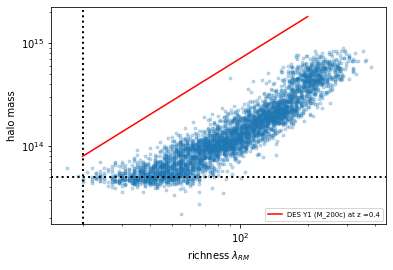

In [39]:
plt.loglog(matched_halo_df['Ngal'], matched_halo_df['M200c'], '.',alpha=0.25)
plt.axvline(20, color='black', linestyle='dotted', lw=2)
plt.axhline(5*10**13, color='black', linestyle='dotted', lw=2)

plt.xlabel("richness $\\lambda_{RM}$")
plt.ylabel('halo mass')


#adding parametrization from litterature
min_richness=20
ll = np.logspace(np.log10(min_richness), np.log10(200))

z0 = 0.4
Om_z0 = cosmo.Om0   

plt.fill_between(ll, M_DES_Y1_lim(ll, z0, 'min', Om_z0),M_DES_Y1_lim(ll, z0, 'max', Om_z0),alpha=0.2,color='r')

plt.plot(ll, M_DES_Y1(ll, z0, Om_z0), 'r-', alpha=1, label='DES Y1 (M_200c) at z ='+str(z0) )
#plt.plot(ll, M_SDSS(ll, z0, Om_z0), 'g-.', alpha=1, label='SDSS (M_200c) at z ='+str(z0))
#plt.plot(ll, M_DES_SV(ll, z0, Om_z0), 'b--', alpha=1, label='DES SV (M_200c) at z ='+str(z0))

plt.legend(fontsize='x-small')

## HOD

In [2]:
df = DataFrame(x = [0.0, 0.0669873, 0.25, 0.5, 0.75, 0.933013, 1.0],
        y = [0.223, 0.291, 0.393, 0.549, 0.73, 0.85, 0.896],
        u_y = [0.023, 0.024, 0.027, 0.031, 0.037, 0.041, 0.043])

x, y = df.x, df.y
wt = 1 ./ df.u_y .^2

p0 = [0.5, 0.5]
m(x, p) = p[1] .+ p[2] * x         # p: model parameters
fit = curve_fit(m, x, y, wt, p0)

cf = coef(fit)
ci = confidence_interval(fit, 0.05)    # 5% significance level

str = @sprintf("Y = (%.2f +/- %.2f) + (%.2f +/- %.2f)*X",
          cf[1],diff([ci[1]...])[1]/2, cf[2],diff([ci[2]...])[1]/2)

tl, bl = ci[1][1] .+ ci[2][2]*x,   ci[1][2] .+ ci[2][1]*x
σp, σm = maximum([tl bl], dims=2) .-  m(x,cf),  m(x,cf) .- minimum([tl bl], dims=2)

plot(x, cf[1] .+ cf[2]*x, color=:lightblue, ribbon=(σp,σm), label=str)
plot!(x, cf[1] .+ cf[2]*x, color=:blues, lw=1, label=false, xlabel="X",ylabel="Y")
scatter!(x,y, ms=3,label=false,mc=:blue, yerror=df.u_y, legend=:topleft)

SyntaxError: invalid syntax (166550618.py, line 6)